***Libraries***

In [81]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

In [82]:
df = pd.read_csv(r"C:\Users\yarde\Downloads\gss_sub.csv")
df.head()

,year,id,labor_status,self_employed,marital_status,n_siblings,age,high_school,degree,political_affiliation,environment,law_enforcement,drugs,space_exploration,inequality,household_size
0,1972.0,1.0,WORKING FULLTIME,SOMEONE ELSE,NEVER MARRIED,3.0,23.0,16.0,BACHELOR,"IND,NEAR DEM",IAP,IAP,IAP,IAP,NaN,1.0
1,1972.0,2.0,RETIRED,SOMEONE ELSE,MARRIED,4.0,70.0,10.0,LT HIGH SCHOOL,NOT STR DEMOCRAT,IAP,IAP,IAP,IAP,NaN,2.0
2,1972.0,3.0,WORKING PARTTIME,SOMEONE ELSE,MARRIED,5.0,48.0,12.0,HIGH SCHOOL,INDEPENDENT,IAP,IAP,IAP,IAP,NaN,4.0
3,1972.0,4.0,WORKING FULLTIME,SOMEONE ELSE,MARRIED,5.0,27.0,17.0,BACHELOR,NOT STR DEMOCRAT,IAP,IAP,IAP,IAP,NaN,2.0
4,1972.0,5.0,KEEPING HOUSE,SOMEONE ELSE,MARRIED,2.0,61.0,12.0,HIGH SCHOOL,STRONG DEMOCRAT,IAP,IAP,IAP,IAP,NaN,2.0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59599 entries, 0 to 59598
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   59599 non-null  float64
 1   id                     59599 non-null  float64
 2   labor_status           59583 non-null  object 
 3   self_employed          59306 non-null  object 
 4   marital_status         59575 non-null  object 
 5   n_siblings             56682 non-null  float64
 6   age                    59599 non-null  float64
 7   high_school            59440 non-null  float64
 8   degree                 59464 non-null  object 
 9   political_affiliation  59257 non-null  object 
 10  environment            59388 non-null  object 
 11  law_enforcement        59378 non-null  object 
 12  drugs                  59380 non-null  object 
 13  space_exploration      59596 non-null  object 
 14  inequality             1532 non-null   float64
 15  ho

In [84]:
#describe of objects
df.describe(include="O")

,labor_status,self_employed,marital_status,degree,political_affiliation,environment,law_enforcement,drugs,space_exploration
count,59583,59306,59575,59464,59257,59388,59378,59380,59596
unique,8,4,5,6,9,5,5,5,5
top,WORKING FULLTIME,SOMEONE ELSE,MARRIED,HIGH SCHOOL,NOT STR DEMOCRAT,IAP,IAP,IAP,IAP
freq,29437,49497,31919,30556,12446,38143,38143,38143,59115


In [85]:
#opinion about government spendings on environment
df['environment'].value_counts(normalize=True)

environment
IAP            0.642268
TOO LITTLE     0.221981
ABOUT RIGHT    0.091685
TOO MUCH       0.028592
DK             0.015475
Name: proportion, dtype: float64

***Change to categorical*** - reduces memory usage

In [86]:
#keys are column names and values are 
dict = {k:"category" for k in df.select_dtypes(include='object').columns}
print(dict)
df = df.astype(dict)

{'labor_status': 'category', 'self_employed': 'category', 'marital_status': 'category', 'degree': 'category', 'political_affiliation': 'category', 'environment': 'category', 'law_enforcement': 'category', 'drugs': 'category', 'space_exploration': 'category'}


In [87]:
df['labor_status'].cat.categories

Index(['KEEPING HOUSE', 'OTHER', 'RETIRED', 'SCHOOL', 'TEMP NOT WORKING',
       'UNEMPL, LAID OFF', 'WORKING FULLTIME', 'WORKING PARTTIME'],
      dtype='object')

In [88]:
# Dictionary of categories to collapse
new_labor_status = {"UNEMPL, LAID OFF": "UNEMPLOYED", 
                    "TEMP NOT WORKING": "UNEMPLOYED",
                    "WORKING FULLTIME": "EMPLOYED",
                    "WORKING PARTTIME": "EMPLOYED"
                   }

df['labor_status_clean'] = df['labor_status'].replace(new_labor_status).astype("category")
df['labor_status_clean'].value_counts()

C:\Users\yarde\AppData\Local\Temp\ipykernel_28056\1539913060.py:8: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.



labor_status_clean
EMPLOYED         35552
KEEPING HOUSE     9650
RETIRED           8102
UNEMPLOYED        3230
SCHOOL            1841
OTHER             1208
Name: count, dtype: int64

***Reordering Categories***

In [89]:
df['environment'].cat.categories

Index(['ABOUT RIGHT', 'DK', 'IAP', 'TOO LITTLE', 'TOO MUCH'], dtype='object')

In [90]:
new_order = ["TOO LITTLE", "ABOUT RIGHT", "TOO MUCH", "DK", "IAP"]
categories_to_remove = ["DK", "IAP"]

for col in ['environment','law_enforcement','drugs']:
    df[col+"_clean"] = df[col].cat.reorder_categories(new_order, ordered=True)
    df[col+"_clean"]= df[col+"_clean"].cat.remove_categories(categories_to_remove)
    #they bacome NA's

In [91]:
df['environment_clean'].value_counts(dropna=False)

environment_clean
NaN            39273
TOO LITTLE     13183
ABOUT RIGHT     5445
TOO MUCH        1698
Name: count, dtype: int64

In [92]:
new_degree = {"LT HIGH SCHOOL": "HIGH SCHOOL", 
              "BACHELOR": "COLLEGE/UNIVERSITY",
              "GRADUATE": "COLLEGE/UNIVERSITY",
              "JUNIOR COLLEGE": "COLLEGE/UNIVERSITY"}

df['degree_clean']= df['degree'].replace(new_degree).astype('category')
df["degree_clean"]= df["degree_clean"].cat.remove_categories(["DK"])
df["degree_clean"] = df["degree_clean"].cat.reorder_categories(["HIGH SCHOOL","COLLEGE/UNIVERSITY"], ordered=True)
df["degree_clean"].value_counts()

C:\Users\yarde\AppData\Local\Temp\ipykernel_28056\1592869016.py:6: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.



degree_clean
HIGH SCHOOL           43553
COLLEGE/UNIVERSITY    15881
Name: count, dtype: int64

***Binning Data*** - Simplifying the data

In [93]:
decade_boundaries = [(1970, 1979), (1979, 1989), (1989, 1999), (1999, 2009), (2009, 2019)]
decade_labels = ['1970s', '1980s', '1990s', '2000s', '2010s']

#create interval to pass to pandas cut
bins= pd.IntervalIndex.from_tuples(decade_boundaries)
df['decade']= pd.cut(df["year"], bins)

df['decade'] = df['decade'].cat.rename_categories(decade_labels)
df[['year', 'decade']]

,year,decade
0,1972.0,1970s
1,1972.0,1970s
2,1972.0,1970s
3,1972.0,1970s
4,1972.0,1970s
...,...,...
59594,2014.0,2010s
59595,2014.0,2010s
59596,2014.0,2010s
59597,2014.0,2010s


In [94]:
df[['year', 'decade']].query("year == 1990")

,year,decade
24893,1990.0,1990s
24894,1990.0,1990s
24895,1990.0,1990s
24896,1990.0,1990s
24897,1990.0,1990s
...,...,...
26260,1990.0,1990s
26261,1990.0,1990s
26262,1990.0,1990s
26263,1990.0,1990s


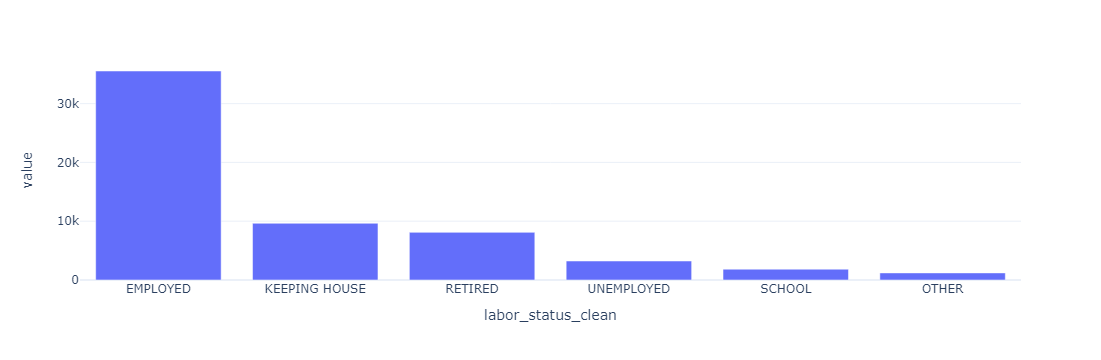

In [95]:
fig = px.bar(df['labor_status_clean'].value_counts(), template='plotly_white')
fig.update_layout(showlegend=False)
fig.show()

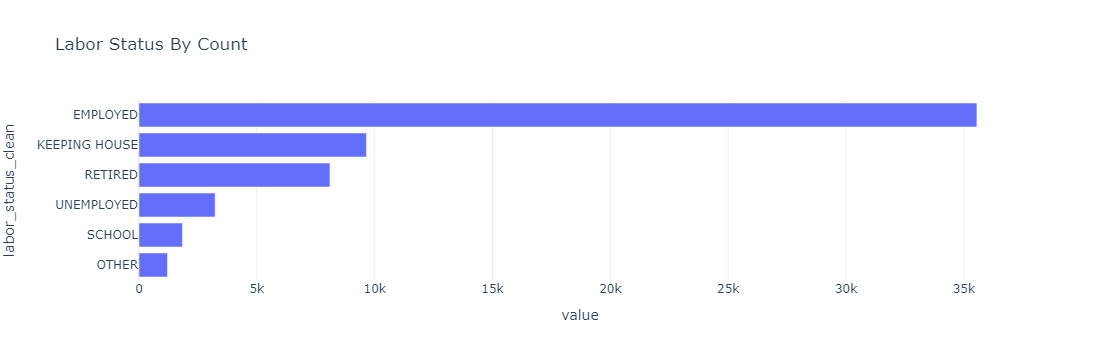

In [96]:
fig = px.bar(df['labor_status_clean'].value_counts(ascending=True),
             template='plotly_white',
             orientation='h',
            title='Labor Status By Count')
fig.update_layout(showlegend=False)
fig.show()

In [99]:
household_by_decade = df.groupby(['decade','degree_clean'], as_index=False, observed=False)['household_size'].mean()
#as_index=False so grouping won't be the index
household_by_decade

,decade,degree_clean,household_size
0,1970s,HIGH SCHOOL,3.269804
1,1970s,COLLEGE/UNIVERSITY,3.033561
2,1980s,HIGH SCHOOL,2.773620
3,1980s,COLLEGE/UNIVERSITY,2.609780
4,1990s,HIGH SCHOOL,2.567347
5,1990s,COLLEGE/UNIVERSITY,2.492244
6,2000s,HIGH SCHOOL,2.495044
7,2000s,COLLEGE/UNIVERSITY,2.399721
8,2010s,HIGH SCHOOL,2.474694
9,2010s,COLLEGE/UNIVERSITY,2.297444


C:\Users\yarde\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\yarde\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



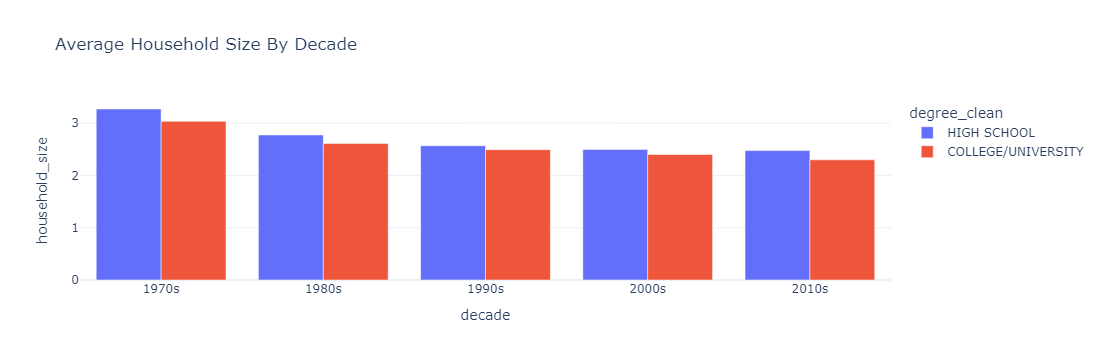

In [102]:
fig = px.bar(household_by_decade,
             x='decade',
             y='household_size',
             color='degree_clean',
             #barmode to have it side by side
             barmode='group',
             template='plotly_white',
            title='Average Household Size By Decade')
fig.show()

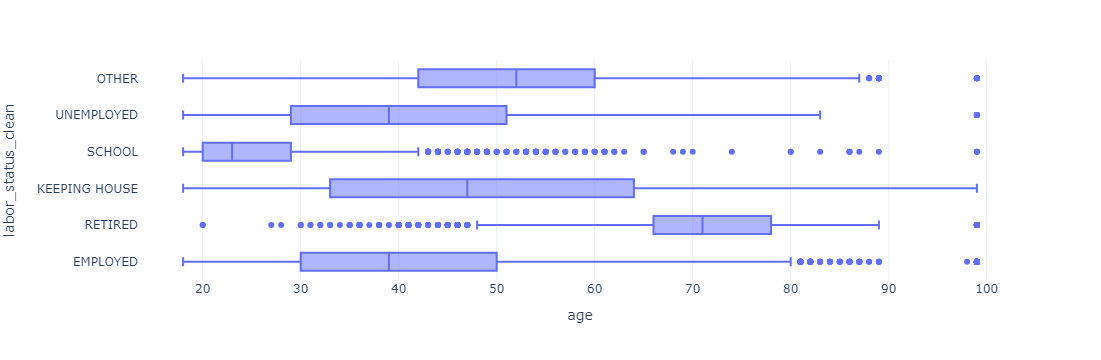

In [105]:
fig = px.box(df,
                x='age',
                y='labor_status_clean',
                template='plotly_white')
fig.show()

In [106]:
#Mosaic plot = relationship between two categorical variables
pd.crosstab(df['degree_clean'], df['law_enforcement_clean'])

law_enforcement_clean,TOO LITTLE,ABOUT RIGHT,TOO MUCH
degree_clean,,,
HIGH SCHOOL,8063,4879,1340
COLLEGE/UNIVERSITY,3230,2635,428


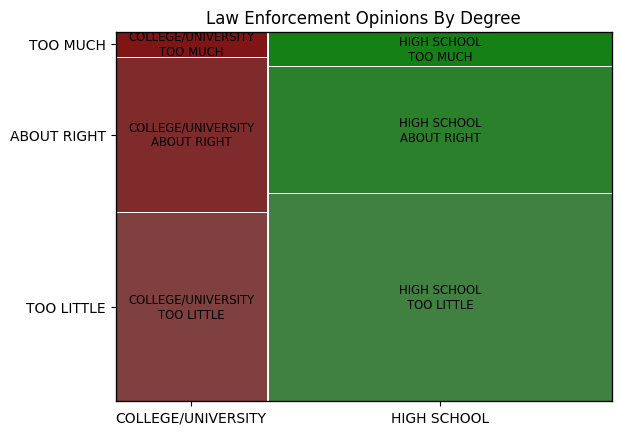

In [107]:
mosaic(df, ["degree_clean","law_enforcement_clean"], title="Law Enforcement Opinions By Degree")
plt.show()

In [108]:
marital_rates = df.groupby(['year'], as_index=False)['marital_status'].value_counts(normalize=True)
marital_rates

,year,marital_status,proportion
0,1972.0,MARRIED,0.719157
1,1972.0,NEVER MARRIED,0.130192
2,1972.0,WIDOWED,0.086175
3,1972.0,DIVORCED,0.040298
4,1972.0,SEPARATED,0.024179
...,...,...,...
145,2014.0,MARRIED,0.456985
146,2014.0,NEVER MARRIED,0.266377
147,2014.0,DIVORCED,0.162194
148,2014.0,WIDOWED,0.082478


C:\Users\yarde\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\yarde\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



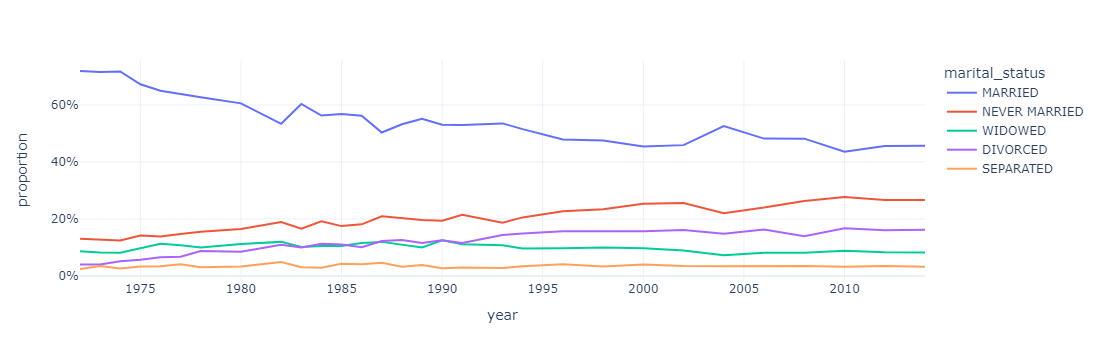

In [109]:
fig = px.line(marital_rates,
              x='year',
              y='proportion',
              color='marital_status',
              template='plotly_white')

fig.update_yaxes(tickformat=".0%")
fig.show()